### Q63. 네이버 검색에서 관심 주제와 기사 수를 입력하면 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

- 기사 제목과 링크를 데이터프레임으로 가져온 후 본문 내용에서 한글 단어만 출력하여 형태소 분석
- 최근 국내 'AI'와 관련하여 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화
- AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

In [5]:
from urllib.parse import quote
import urllib
from bs4 import BeautifulSoup
import re
import pandas as pd
from collections import Counter
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정


In [15]:
from urllib.parse import quote
import urllib
from bs4 import BeautifulSoup
import re
import pandas as pd
df_1 = pd.DataFrame(columns=['text'])


query = quote(input('검색 할 내용을 입력하세요.'))
cnt = int(input('원하는 기사의 수를 입력하세요.'))
start = 1
ind = 0
url_link =[]
text_all =[]
tatile =[]
print(f'='*100+'\n현재 URL 수집 중 입니다.')
while cnt > len(url_link):
    url = f'https://search.naver.com/search.naver?where=news&query={query}&start={str(start)}'
    html = urllib.request.urlopen(url)
    bs = BeautifulSoup(html,'lxml')
    mask = bs.select('.list_news > li > div > div > div > div > a.info')
    for x in mask:
        if (cnt >len(url_link)) & (x.get_text() == '네이버뉴스'):
            url_link.append(x['href'])
    start += 10
    list(set(url_link))
    
print(f'URL 수집 종료.')
print(f'='*100+'\n현재 본문 수집 중 입니다.')
for url in url_link:
    response = urllib.request.urlopen(url)
    soup = BeautifulSoup(response, 'lxml')
    text = soup.select_one('#dic_area')
    if text == None:
        pass
    else:
        text_all.append(text.text)
print(f'='*100+'\n본문 수집 종료.')
df_1['text'] = text_all
df_1

검색 할 내용을 입력하세요.영화 극한직업
원하는 기사의 수를 입력하세요.100
현재 URL 수집 중 입니다.
URL 수집 종료.
현재 본문 수집 중 입니다.
본문 수집 종료.


,text
0,\n\n\n\n\n2022년 2월▽점심시간이면 서울 정동이나 명동 골목길은 활기가 ...
1,\n'극한직업' 이병헌 감독·'지우학' 주동근·'기기괴괴' 오성대 작가 등 참여\n...
2,"\n경찰청, 위장수사 확대 방안 추진윤희근 청장 취임 후 정책안 배포다크웹 등 은밀..."
3,\n\n\n\n\n신한옥 건물로 건축된 팔달문화센터 외관. / 사진제공=수원시 최근...
4,\n25~28일 코엑스에서 개최\n\n\n\n오는 25~28일 서울 코엑스에서 열리...
5,\n[앵커]한 주 동안의 대선 이슈를 영화 예고편처럼 정리해 드립니다. '방구석 캠...
6,\n\n\n\n\n 영화 극한직업의 제작자가 목원대를 찾아 특강한다.목원대는 오는 ...
7,\n청소년 사범 늘고 다크웹 등 경로 다양“조직화된 마약 범죄 소탕하려면 필요”영국...
8,\n이어서 ET콕입니다. 2019년 개봉 영화 극한 직업입니다. [영화 <극한...
9,\n\t\t\t토종 인터넷동영상서비스 플랫폼 '왓챠'가 이병헌 감독과 손잡고 오리지...


기사 본문 WordCloud


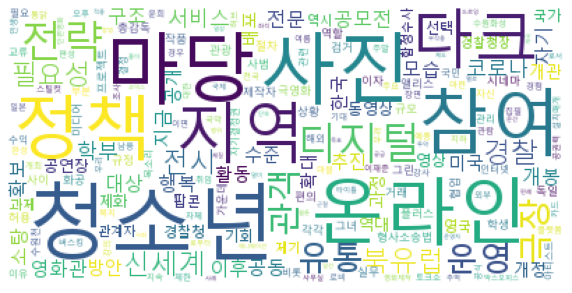

In [19]:
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stopword = ['인공','지능','개발','활용','통해','이번','분야','영화','극한','직업','제작','예술','왓챠','마약','수사',
            '위해','진행','예정','기자','평가','지난','현재','범죄','조직','문화','드라마','콘텐츠','특강','위장','팔달문',
            '라며','확인','방식','실제','이용','센터','이병헌','대선','대표','불법',
            '뉴스','이미지','의미','출시','발생','내용','발표','상품','지난해','최종병기','공연','도박','프로그램','후보','시민',
            '시작','때문','최초','단계','가지','스케','통한','하나','감독','수원',''
            '가장','더욱','직접','뉴시스','모든','추천','광고','또한','목원대','제공','행사','검토','제공','아동','경로','건물',
            '실시간','기사','모두','기간','홈페이지','검색','누구','우선','계획','연출','배우',
            '연합뉴스','앞서','그동안','이데일리','지난달','대부분','여기','예술인','형사','성범죄',
            '작년','번역','미디어아트','업데이트','파이낸셜뉴스','페이지','리지','수원시','공간','서울','기획','잠입','작가','사람',
            '무엇','이름']

noun =[]
for d in df_1.text:
    morphs = Okt().pos(d)
    for j,k in morphs:
        if(len(j) > 1 ) & (k == 'Noun'):
            noun.append(j)
wordsbody = dict(Counter(noun).most_common())
for i in stopword:
    if i in wordsbody:
        wordsbody.pop(i)

print('기사 본문 WordCloud')
wc = WordCloud(font_path='../../m2_분석라이브러리활용/malgun.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(wordsbody)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
import numpy as np
se_wc = pd.Series(wordsbody)
df_wc = pd.DataFrame(se_wc,columns=['cnt'])
df_wc.reset_index(inplace=True)
df_wc

In [ ]:
# df_wc.to_csv('wc.csv')
# df_1.to_csv('df_1.csv')
df_wc = pd.read_csv('df_wc')
df_1 = pd.read_csv('df_1.csv')
df_1

In [ ]:
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stopword = ['인공','지능','개발','활용','통해','이번','분야','제공','설명',
            '위해','진행','예정','기자','평가','지난','현재',
            '라며','확인','방식','실제','이용',
            '뉴스','이미지','의미','출시','발생','내용','발표','상품','지난해',
            '시작','때문','최초','단계','가지','스케','통한','하나',
            '가장','더욱','직접','뉴시스','모든','추천','광고','또한',
            '실시간','기사','모두','기간','홈페이지','검색','누구','우선',
            '연합뉴스','앞서','그동안','이데일리','지난달','대부분','여기',
            '작년','번역','미디어아트','업데이트','파이낸셜뉴스','페이지',
            '무엇','이름']

noun =[]
for d in df_1.text:
    morphs = Okt().pos(d)
    for j,k in morphs:
        if(len(j) > 1 ) & (k == 'Noun'):
            noun.append(j)
wordsbody = dict(Counter(noun).most_common())
for i in stopword:
    if i in wordsbody:
        wordsbody.pop(i)

print('기사 본문 WordCloud')
wc = WordCloud(font_path='../../m2_분석라이브러리활용/malgun.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(wordsbody)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
df5 = pd.DataFrame(list(wordsbody.items()),
                   columns=['index', 'number'])
df5.head(15)

In [ ]:
sns.barplot(x='index',y='number',data=df5.iloc[:][0:15],orient='v',)